# Q-learning agent (notebook)

In [2]:
# Import packages 
import numpy as np 
import random 
import gym
from value_function_utils import visualize_grid_action_values
from envs.gridworldv2 import GridworldV2Env


In [8]:
# initialize environment 
env = GridworldV2Env(step_cost=-0.1, max_ep_length=30)

# initialize hyper parameter
max_episode = 4000
gamma = 0.99
alpha = 0.01 
epsilon = 1


Make epsilon greedy policy function / Decaying function

In [10]:
def greedy_policy(q_values: np.ndarray, epsilon=0.1):

    if random.random() >= epsilon:
        return np.argmax(q_values)
    else:
        return random.randint(0, env.action_space.n-1)

def decay(epsilon):
    max_epsilon = 1
    min_epsilon = 0.01

    if epsilon > max_epsilon:
        epsilon = max_epsilon
        return epsilon
    elif epsilon <= min_epsilon:
        return min_epsilon
    else:
        epsilon *= 0.99
        return epsilon
    



In [11]:
# initialize action value function table 
q = np.zeros((len(env.distinct_states), env.action_space.n))
q[env.bomb_state] = -1
q[env.goal_state] = 1
q

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

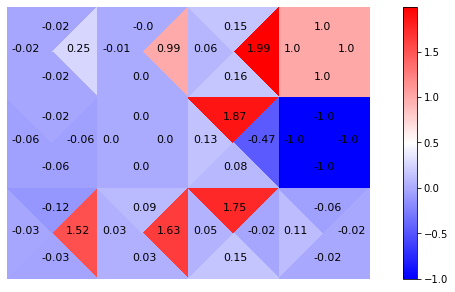

In [12]:
# iteration (almost same with SARSA but the update is different) 

for episode in range(max_episode):
    done = False 
    state = env.reset()                 # initialize random state 
    action = env.action_space.sample()  # initialize random action

    while not done: 
        epsilon = decay(epsilon)
        action = greedy_policy(q[state], epsilon=epsilon)
        next_state, reward, done = env.step(action)

        # Q - update 
        q[state][action] += alpha * (
            reward + gamma * np.max(q[next_state]) - q[state][action]
        )

        state = next_state 

visualize_grid_action_values(q)